In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
#from google.colab import files
#uploaded = files.upload() #if you work in google colab

# Intro

The following data set includes 15 women with their height and weight. All participants were in the age range of 30-39.

We will predict the height based on their weight. This will be done with linear regression.

In [2]:
file='data.csv'
df=pd.read_csv(file)
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


# Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [4]:
df.shape

(15, 2)

In [5]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

We have no null values, and all data types make sense, so we can proceed with the exploratory analysis.

# Exploratory Analysis

In [6]:
df.Height.value_counts()

1.47    1
1.50    1
1.52    1
1.55    1
1.57    1
1.60    1
1.63    1
1.65    1
1.68    1
1.70    1
1.73    1
1.75    1
1.78    1
1.80    1
1.83    1
Name: Height, dtype: int64

In [7]:
df.Weight.value_counts()

52.21    1
53.12    1
54.48    1
55.84    1
57.20    1
58.57    1
59.93    1
61.29    1
63.11    1
64.47    1
66.28    1
68.10    1
69.92    1
72.19    1
74.46    1
Name: Weight, dtype: int64

As we can see, all values appear once, so there is no need for visualization.

So we can move on and start the analysis.

# Linear regression
## Assumptions
### Linearity

/Users/alexandergandji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Height'>

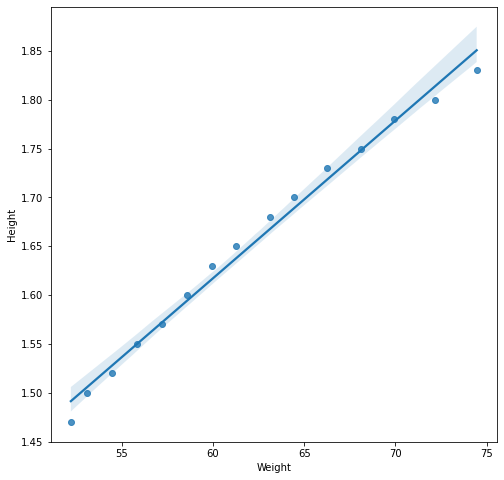

In [8]:
plt.figure(figsize=(8,8))
sns.regplot(df.Weight, df.Height)

As we can see, we have linearity between the dependent (height) and independent (weight) variables. 

Next, we want to check for homoscedasticity.

## Checking for Homoscedasticity

/Users/alexandergandji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

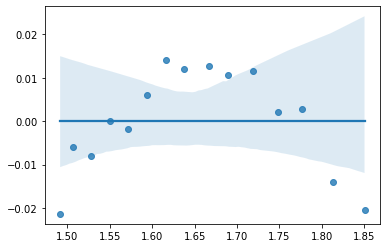

In [9]:
model=sm.OLS.from_formula('Height ~ Weight', data=df)
result=model.fit()
sns.regplot(result.fittedvalues, result.resid)

The graph does not indicate heteroscedasticity, but we will do a Goldfeld Quandt test to make sure.

In [10]:
sm.stats.diagnostic.het_goldfeldquandt(result.resid, result.model.exog, drop=0.2)

(0.6528023737635948, 0.6848174673812584, 'increasing')

The p-value is not smaller than 0.05, therefore we have homoscedasticity.

## Checking for normality of residuals

((array([-1.69372899, -1.22918025, -0.93620006, -0.70737068, -0.51078428,
         -0.33229293, -0.1638693 ,  0.        ,  0.1638693 ,  0.33229293,
          0.51078428,  0.70737068,  0.93620006,  1.22918025,  1.69372899]),
  array([-2.13546561e-02, -2.05654623e-02, -1.39178879e-02, -8.00223047e-03,
         -6.04597445e-03, -1.91474251e-03,  4.15135119e-05,  2.11232323e-03,
          2.72968650e-03,  5.96755842e-03,  1.07161536e-02,  1.14949600e-02,
          1.20550464e-02,  1.26724096e-02,  1.40113024e-02])),
 (0.012225361365425723, -1.6128002423127071e-15, 0.9654775130541721))

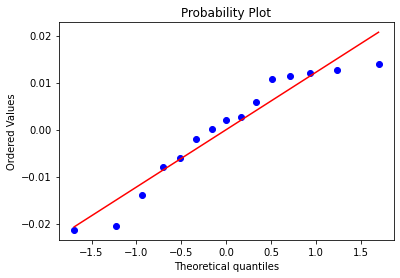

In [11]:
stats.probplot(result.resid, dist='norm', plot=plt)

In [12]:
from scipy.stats import kstest
kstest(result.resid, 'norm', stats.norm.fit(result.resid))

KstestResult(statistic=0.15823829106356746, pvalue=0.7924907400986513)

The Kolmogrov-Smirnov test and Q-Q-plot show a normal distribution of the residuals because our p-value is bigger than 0.05, and the plots are relatively close to the line.

## Linear Regression Model

In [26]:
model=sm.OLS.from_formula('Height ~ Weight', data=df)
result=model.fit()
result.summary()

/Users/alexandergandji/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1190.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           3.60e-14
Time:                        12:37:19   Log-Likelihood:                 45.735
No. Observations:                  15   AIC:                            -87.47
Df Residuals:                      13   BIC:                            -86.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6485      0.029     22.191      0.000       0.585       0.712
Weight         0.0161      0.000     34.502      0.000       0.015       0.017
==============================================================================
Omnibus:                        1.577   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.241
Skew:                          -0.545   Prob(JB):                        0.538
Kurtosis:                       2.107   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Setting up the the function

In [27]:
result.params

Intercept    0.648460
Weight       0.016144
dtype: float64

In [57]:
def height_func(weight):
  y=round(0.648460+(0.016144*weight),2)
  return(y)

In [58]:
#existing value form the table
height_func(58.57)

1.59

In [59]:
#existing value form the table
height_func(59.93)

1.62

In [60]:
#value which is not in the table, actual prediction
height_func(75)

1.86

We have set up the linear function with the coefficients. This will allow us to predict the height of women. To get an idea of how accurate our predictions will be, we showcase the data set of the heights and weights of women.

In [44]:
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


Our model allows us, based on the weight, to predict the height of women in their thirties (based on the data set) with 98.8% accuracy (Adj. R-squared). 